<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [26]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import patsy
from patsy import dmatrices
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from statsmodels.compat import lzip
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [2]:
df=pd.read_csv('/Users/lilexin/Desktop/ECON628-lessdaa/datasets/sleep/sleep_bh.csv')

In [3]:
df.shape

(706, 34)

In [4]:
df.dtypes

age           int64
black         int64
case          int64
clerical    float64
construc    float64
educ          int64
earns74       int64
gdhlth        int64
inlf          int64
leis1         int64
leis2         int64
leis3         int64
smsa          int64
lhrwage     float64
lothinc     float64
male          int64
marr          int64
prot          int64
rlxall        int64
selfe         int64
sleep         int64
slpnaps       int64
south         int64
spsepay       int64
spwrk75       int64
totwrk        int64
union         int64
worknrm       int64
workscnd      int64
exper         int64
yngkid        int64
yrsmarr       int64
hrwage      float64
agesq         int64
dtype: object

In [5]:
df.count()

age         706
black       706
case        706
clerical    706
construc    706
educ        706
earns74     706
gdhlth      706
inlf        706
leis1       706
leis2       706
leis3       706
smsa        706
lhrwage     532
lothinc     706
male        706
marr        706
prot        706
rlxall      706
selfe       706
sleep       706
slpnaps     706
south       706
spsepay     706
spwrk75     706
totwrk      706
union       706
worknrm     706
workscnd    706
exper       706
yngkid      706
yrsmarr     706
hrwage      532
agesq       706
dtype: int64

In [6]:
df2=df[df.isnull().values==True]
df2.head(5) #messive to show the whole thing

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
532,34,0,533,0.182331,0.030075,17,0,1,0,3922,...,0,2443,0,2403,40,11,0,14,NaN,1156
532,34,0,533,0.182331,0.030075,17,0,1,0,3922,...,0,2443,0,2403,40,11,0,14,NaN,1156
533,44,1,534,0.182331,0.030075,15,0,1,0,5635,...,0,995,0,995,0,23,0,22,NaN,1936
533,44,1,534,0.182331,0.030075,15,0,1,0,5635,...,0,995,0,995,0,23,0,22,NaN,1936
534,58,0,535,0.182331,0.030075,15,0,1,0,4370,...,0,1975,0,1975,0,37,0,29,NaN,3364


In [7]:
list_of_index=df2.index
print list_of_index

Int64Index([532, 532, 533, 533, 534, 534, 535, 535, 536, 536,
            ...
            701, 701, 702, 702, 703, 703, 704, 704, 705, 705],
           dtype='int64', length=348)


### Missing value in lhrwage, and hrwage

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [8]:
df1=df.dropna(how='any',axis=0)
df1.shape
df1.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [9]:
df1.describe().T



,count,mean,std,min,25%,50%,75%,max
age,532.0,38.317669,11.232965,23.000000,29.000000,36.000000,47.000000,65.000000
black,532.0,0.050752,0.219697,0.000000,0.000000,0.000000,0.000000,1.000000
case,532.0,266.500000,153.719441,1.000000,133.750000,266.500000,399.250000,532.000000
clerical,532.0,0.182331,0.386480,0.000000,0.000000,0.000000,0.000000,1.000000
construc,532.0,0.030075,0.170955,0.000000,0.000000,0.000000,0.000000,1.000000
educ,532.0,12.731203,2.693566,1.000000,12.000000,12.000000,15.000000,17.000000
earns74,532.0,9703.947368,8214.777772,0.000000,3500.000000,8250.000000,13750.000000,42500.000000
gdhlth,532.0,0.885338,0.318913,0.000000,1.000000,1.000000,1.000000,1.000000
inlf,532.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
leis1,532.0,4659.988722,892.359993,2090.000000,4102.750000,4595.000000,5112.750000,7335.000000


### For binary variable 'inlf', we lost all '0'values.

In [10]:
df1=df1.drop(['inlf'],axis=1)


In [11]:
df1.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,leis1,leis2,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,3529,3479,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,2140,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,4595,4505,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,3211,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,4052,4007,...,1,2580,0,2580,0,44,0,33,2.750000,4096


## 3. Check for correlations
    Implement a correlation heatmap
---

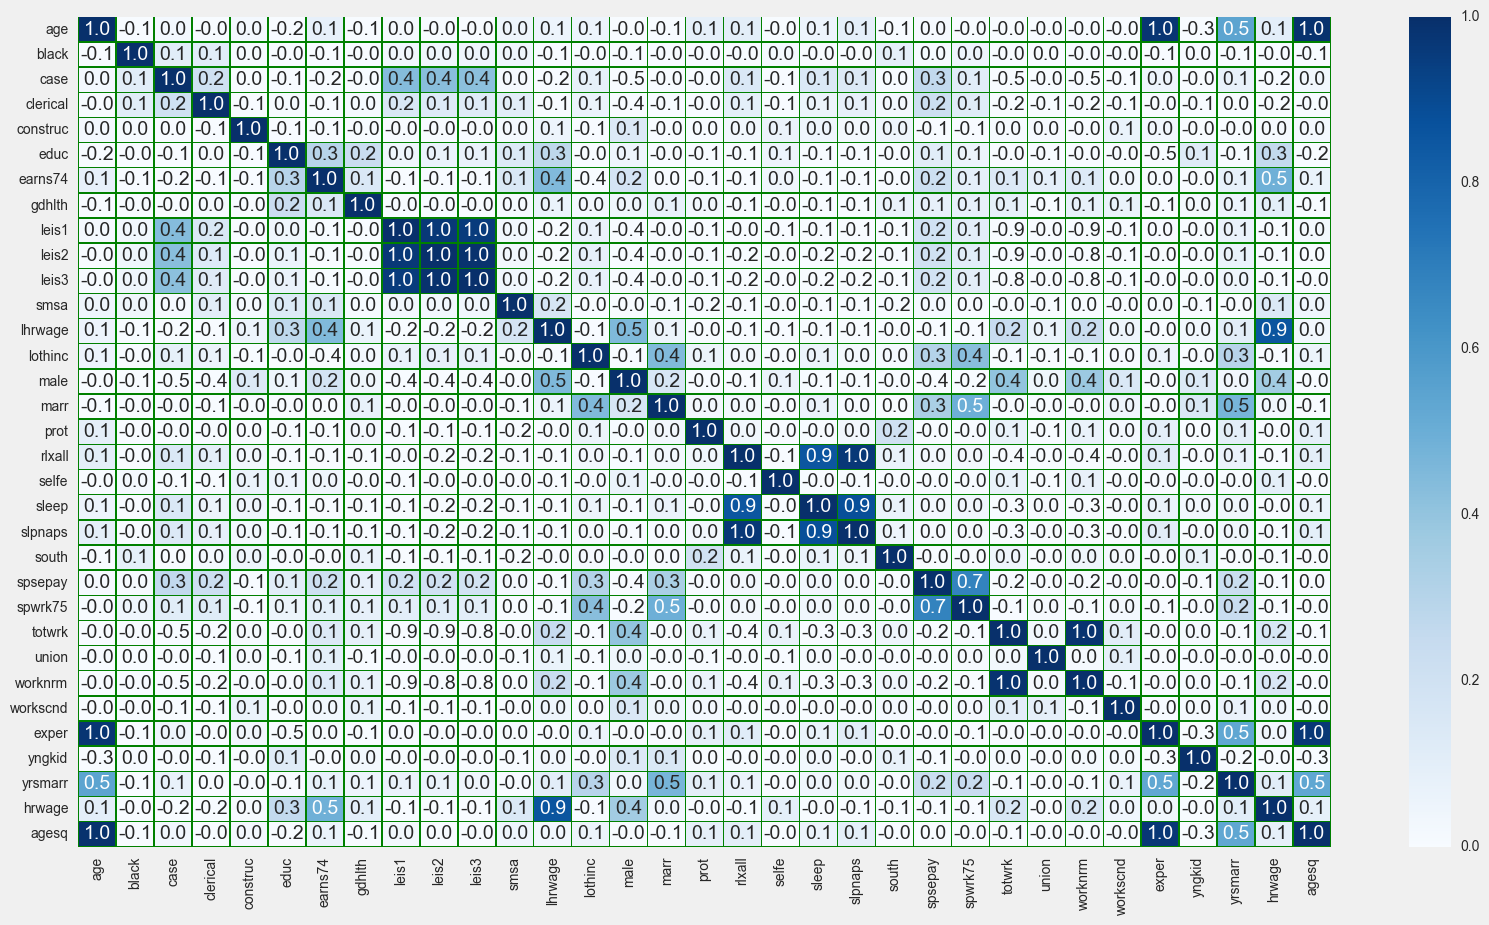

In [12]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df1.corr(), annot=True, linewidths=.3, cmap=plt.cm.Blues, vmin=0, vmax=1, ax=ax,fmt='.1f',linecolor='g')
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

y:sleep
x:black age educ lhrwage male clerical construc earns74 gdhlth smsa marer prot  south spsepay spwrk75 union worknrm yngkid worksecon
#not defining here, just keep it down. And here x should not contain two variables with corr=1 together

In [13]:
df1['age_s']=(df1['age']-np.mean(df1['age']))/(np.std(df['age']))
df1['educ_s']=(df1['educ']-np.mean(df1['educ']))/(np.std(df['educ']))
df1['yrsmarr_s']=(df1['yrsmarr']-np.mean(df1['yrsmarr']))/(np.std(df['yrsmarr']))
df1['earns74_s']=(df1['earns74']-np.mean(df1['earns74']))/(np.std(df['earns74']))
df1['spsepay_s']=(df1['spsepay']-np.mean(df1['spsepay']))/(np.std(df['spsepay']))
df1['worknrm_s']=(df1['worknrm']-np.mean(df1['age']))/(np.std(df['worknrm']))
df1['workscnd_s']=(df1['workscnd']-np.mean(df1['workscnd']))/(np.std(df['workscnd']))





In [14]:
df1.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,leis1,leis2,...,yrsmarr,hrwage,agesq,age_s,educ_s,yrsmarr_s,earns74_s,spsepay_s,worknrm_s,workscnd_s
0,32,0,1,0.0,0.0,12,0,0,3529,3479,...,13,7.070004,1024,-0.557379,-0.262765,0.157412,-1.041533,-0.639531,3.598950,-0.203542
1,31,0,2,0.0,0.0,14,9500,1,2140,2140,...,0,1.429999,961,-0.645604,0.455954,-0.964921,-0.021890,-0.639531,5.273677,-0.203542
2,44,0,3,0.0,0.0,17,42500,1,4595,4505,...,0,20.529997,1936,0.501326,1.534032,-0.964921,3.520029,1.787342,2.939434,-0.203542
3,30,0,4,0.0,0.0,12,42500,1,3211,3211,...,12,9.619998,900,-0.733830,-0.262765,0.071079,3.520029,-0.032813,3.967347,-0.203542
4,64,0,5,0.0,0.0,14,2500,1,4052,4007,...,33,2.750000,4096,2.265835,0.455954,1.884078,-0.773206,-0.348307,2.690659,-0.203542


In [15]:
y, x = patsy.dmatrices("sleep ~  age_s+ black+yrsmarr_s +educ_s+ lhrwage+ male+ clerical+ construc+ earns74_s+ workscnd_s+ gdhlth+ smsa+ marr+ prot+  south+ spsepay_s+ spwrk75+ union+ worknrm_s+ yngkid", data=df1, return_type="dataframe")
y = np.ravel(y)


In [16]:
print ('shape of y:',y.shape)
print ('shape of x:',x.shape)

('shape of y:', (532,))
('shape of x:', (532, 21))


In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30)

In [18]:
print ("Shape of X train:", xtrain.shape) 
print ("Shape of y train:", ytrain.shape)
print ("\n=====\n")
print ("Shape of X test:", xtest.shape)
print ("Shape of y test:", ytest.shape)

('Shape of X train:', (372, 21))
('Shape of y train:', (372,))

=====

('Shape of X test:', (160, 21))
('Shape of y test:', (160,))


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

In [19]:
lm =linear_model.LinearRegression()
model = lm.fit(xtrain, ytrain)

print ("R^2: %.3f" % (model.score(xtrain, ytrain)))


R^2: 0.173


In [20]:
predictions = lm.predict(xtest)
predictions.shape
#predictions are the predict value of y, using x test

(160,)

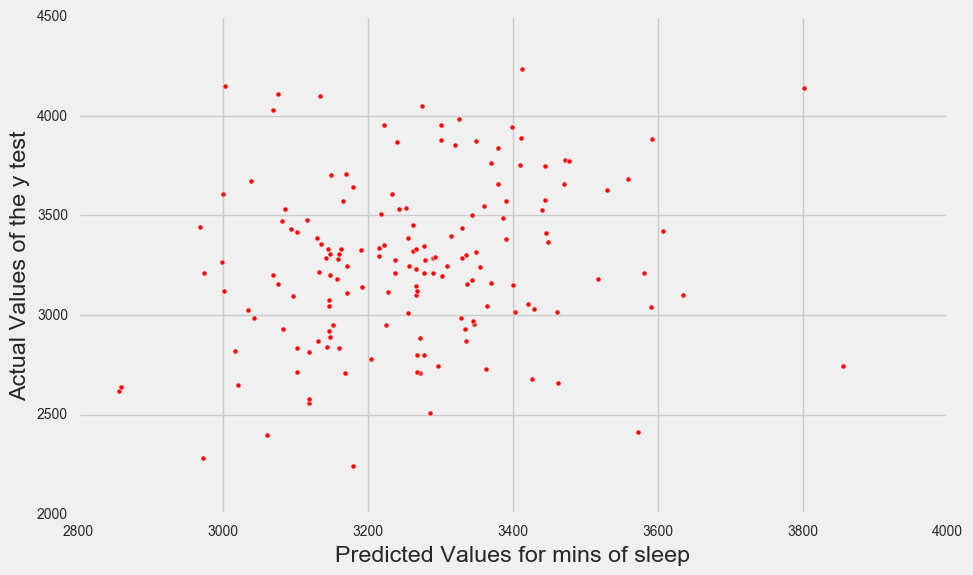

In [21]:
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, ytest, s=14, c='red', )
plt.xlabel("Predicted Values for mins of sleep")
plt.ylabel("Actual Values of the y test")
plt.show()

 

In [22]:
mean_squared_error(ytest, predictions)

166313.46218610377

## 4.2.2 Regularization
    
---

In [23]:
print xtrain.shape, xtest.shape, ytrain.shape, ytest.shape 

(372, 21) (160, 21) (372,) (160,)


In [24]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [25]:
linreg_scores = cross_val_score(lm, xtrain, ytrain, cv=15)
print linreg_scores

[-0.06414346  0.20155469  0.12901489  0.01681025 -0.33425236  0.11704057
 -0.02086596 -0.38446442 -0.0320627  -0.32916584  0.13374657 -0.34877025
  0.11948914  0.36308725  0.38059139]


In [28]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=15)
optimal_ridge.fit(xtrain, ytrain)
print (optimal_ridge.alpha_)

91.1588829975


In [29]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

In [30]:
ridge.fit(xtrain, ytrain)
ytrain_pred_ridge = ridge.predict(xtrain)
ytest_pred_ridge = ridge.predict(xtest)

In [31]:
ridge_scores = cross_val_score(ridge, xtrain, ytrain, cv=15)

In [32]:
print ridge_scores

[ 0.06743767  0.19989709  0.11210472  0.06328372 -0.21755231  0.02935088
  0.02993656 -0.20075811  0.06790188 -0.1725904   0.18279772 -0.21252734
  0.13044734  0.19111308  0.29181308]


In [34]:
print np.mean(ridge_scores)

0.0375103714511


In [35]:
optimal_lasso = LassoCV(n_alphas=500, cv=15, verbose=1)
optimal_lasso.fit(xtrain, ytrain)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

25.9866029806


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [39]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(xtrain, ytrain)
ytrain_pred_lasso = lasso.predict(xtrain)
ytest_pred_lasso = lasso.predict(xtest)
lasso_scores = cross_val_score(lasso, xtrain, ytrain, cv=15)

print lasso_scores


[ 0.11025144  0.23667656  0.13400426  0.07823133 -0.14057725  0.05778756
  0.06258237 -0.16247868  0.10783287 -0.1630875   0.18287257 -0.21351277
  0.06869757  0.12003649  0.24113782]


In [41]:
print np.mean(lasso_scores)

0.048030310942


In [67]:
print mean_squared_error(ytrain, ytrain_pred_lasso)
print mean_squared_error(ytest, ytest_pred_lasso)

171294.078451
154953.38572


In [68]:
print r2_score(ytrain, ytrain_pred_lasso)
print r2_score(ytest, ytest_pred_lasso)

0.1160161979
0.0657387125591


In [54]:
l1_ratios=np.linspace(0.01,1.0,50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=15,verbose=1)
optimal_enet.fit(xtrain, ytrain)



........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv=15, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.01   ,  0.0302 ,  0.05041,  0.07061,  0.09082,  0.11102,
        0.13122,  0.15143,  0.17163,  0.19184,  0.21204,  0.23224,
        0.25245,  0.27265,  0.29286,  0.31306,  0.33327,  0.35347,
        0.37367,  0.39388,  0.41408,  0.43429,  0.45449,  0.47469,
        0.4949 ,  0.515...3837,
        0.85857,  0.87878,  0.89898,  0.91918,  0.93939,  0.95959,
        0.9798 ,  1.     ]),
       max_iter=1000, n_alphas=300, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=1)

In [56]:
print optimal_enet.alpha_
print optimal_enet.l1_ratio_


25.9241151591
1.0


In [58]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet.fit(xtrain, ytrain)
ytrain_pred_enet = enet.predict(xtrain)
ytest_pred_enet = enet.predict(xtest)


In [61]:
enet_scores = cross_val_score(enet, xtrain, ytrain, cv=15)
print enet_scores

[ 0.11021837  0.23678693  0.13407636  0.07820719 -0.14075686  0.05781432
  0.06263709 -0.16248236  0.10785132 -0.1633061   0.18286028 -0.21363302
  0.06868795  0.12006404  0.24123345]


In [65]:
print mean_squared_error(ytrain, ytrain_pred_enet)
print mean_squared_error(ytest, ytest_pred_enet)

171291.042569
154953.397737


In [66]:
print r2_score(ytrain, ytrain_pred_enet)
print r2_score(ytest, ytest_pred_enet)

0.116031864935
0.065738640104


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

1.It Maximize  R square
2.Minimize RSS+Lasso/Ridge score


## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [92]:
def dist_function(y_predict1,y_predict2,y_predict3):
    resid1=ytest-y_predict1
    resid2=ytest-y_predict2
    resid3=ytest-y_predict3
    
    sns.distplot(resid1, bins=30, hist=True, kde=True, 
             color='steelblue')
    plt.show()
    sns.distplot(resid2, bins=30, hist=True, kde=True, 
             color='Red')
    plt.show()
    sns.distplot(resid3, bins=30, hist=True, kde=True, 
             color='Green')
    plt.show()
    



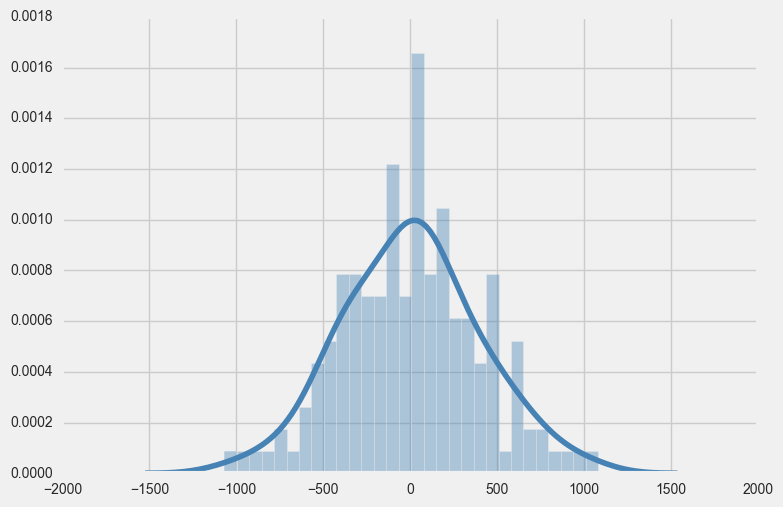

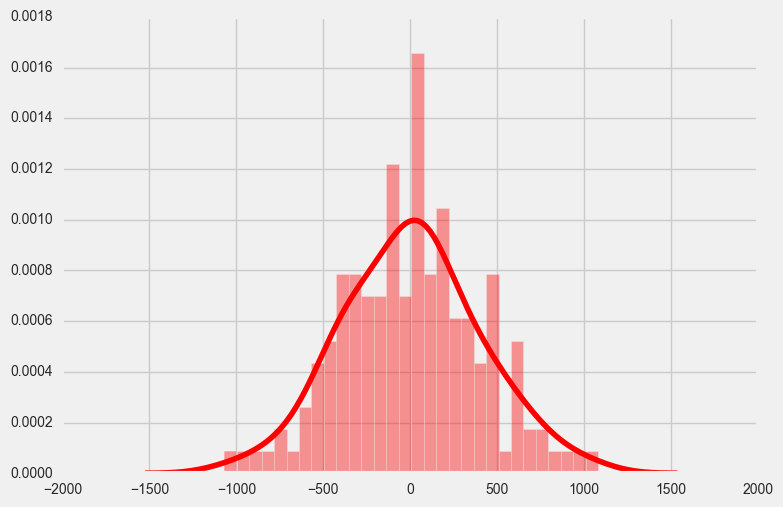

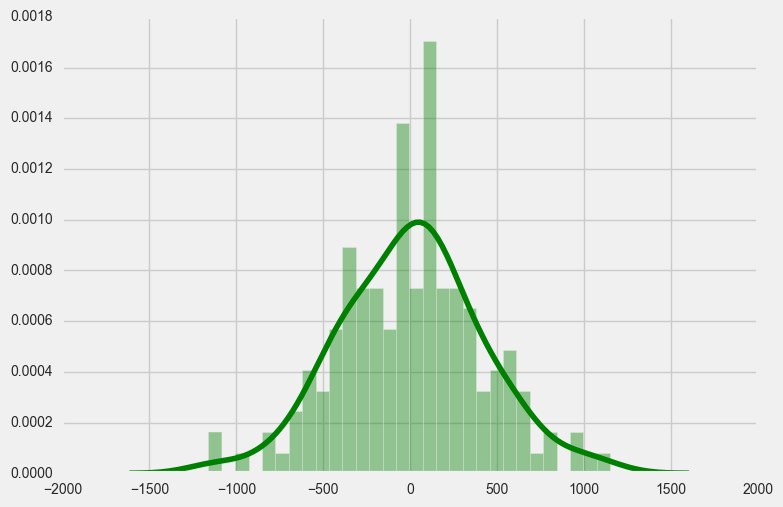

In [93]:
dist_function(ytest_pred_enet,ytest_pred_lasso,predictions)

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS:When the corelation

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS: